In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sheet_names = pd.ExcelFile('Assingment_Dataset.xlsx').sheet_names
print(sheet_names)

['Geospatial Data', 'Satellite Details', 'News Reports', 'Historical Incidents']


In [7]:
df = pd.read_excel('Assingment_Dataset.xlsx' , sheet_name = 'Geospatial Data')
df.head()

,ID,Timestamp,Latitude,Longitude,Location,Movement Type,Country
0,1,2024-03-01 07:15:00,28.7041,77.1025,Border Post Alpha,Entry,Country A
1,2,2024-03-02 12:30:00,28.7042,77.1030,Border Post Alpha,Exit,Country A
2,3,2024-03-05 08:15:00,28.7043,77.1032,Border Post Alpha,Entry,Country A
3,4,2024-03-07 10:00:00,28.7044,77.1035,Border Post Alpha,Exit,Country A
4,5,2024-03-09 14:45:00,28.7045,77.1038,Border Post Alpha,Entry,Country A


In [8]:
df.tail(10)

,ID,Timestamp,Latitude,Longitude,Location,Movement Type,Country
20,21,2024-04-17 13:30:00,28.7061,77.1078,Border Post Delta,Exit,Country B
21,22,2024-04-19 08:40:00,28.7062,77.1080,Border Post Delta,Entry,Country A
22,23,2024-04-22 07:50:00,28.7063,77.1083,Border Post Delta,Exit,Country B
23,24,2024-04-24 10:20:00,28.7064,77.1085,Border Post Echo,Entry,Country A
24,25,2024-04-27 14:30:00,28.7065,77.1088,Border Post Echo,Exit,Country B
25,26,2024-04-29 12:15:00,28.7066,77.1090,Border Post Echo,Entry,Country A
26,27,2024-05-02 09:10:00,28.7067,77.1093,Border Post Echo,Exit,Country B
27,28,2024-05-04 07:25:00,28.7068,77.1095,Border Post Echo,Entry,Country A
28,29,2024-05-07 14:40:00,28.7069,77.1098,Border Post Echo,Exit,Country B
29,30,2024-05-09 08:55:00,28.7070,77.1100,Border Post Echo,Entry,Country A


In [9]:
df.describe()

,ID,Timestamp,Latitude,Longitude
count,30.000000,30,30.000000,30.000000
mean,15.500000,2024-04-04 10:01:20.000000256,28.705550,77.106380
min,1.000000,2024-03-01 07:15:00,28.704100,77.102500
25%,8.250000,2024-03-18 01:52:30,28.704825,77.104575
50%,15.500000,2024-04-04 12:45:00,28.705550,77.106400
75%,22.750000,2024-04-21 14:02:30,28.706275,77.108225
max,30.000000,2024-05-09 08:55:00,28.707000,77.110000
std,8.803408,NaN,0.000880,0.002227


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             30 non-null     int64         
 1   Timestamp      30 non-null     datetime64[ns]
 2   Latitude       30 non-null     float64       
 3   Longitude      30 non-null     float64       
 4   Location       30 non-null     object        
 5   Movement Type  30 non-null     object        
 6   Country        30 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.8+ KB


In [11]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[28.705, 77.106], zoom_start=10)
heat_mapData = [[row['Latitude'] , row['Longitude']] for index , row in df.iterrows()]
HeatMap(heat_mapData).add_to(m)

In [12]:
m.save("hmap.html")

In [13]:
border_post_counts = df.groupby(['Location', 'Movement Type']).size().unstack(fill_value=0)
print(border_post_counts)

Movement Type        Entry  Exit
Location                        
Border Post Alpha        3     2
Border Post Bravo        3     3
Border Post Charlie      3     3
Border Post Delta        3     3
Border Post Echo         4     3


In [14]:
country_counts = df['Country'].value_counts()
print(country_counts)

Country
Country A    15
Country B    15
Name: count, dtype: int64


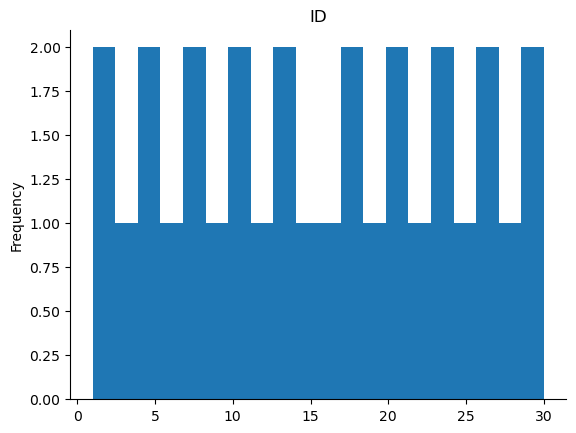

In [15]:
df['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

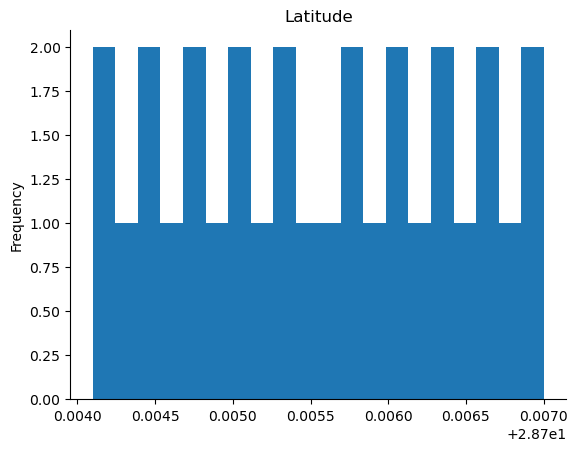

In [16]:
df['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

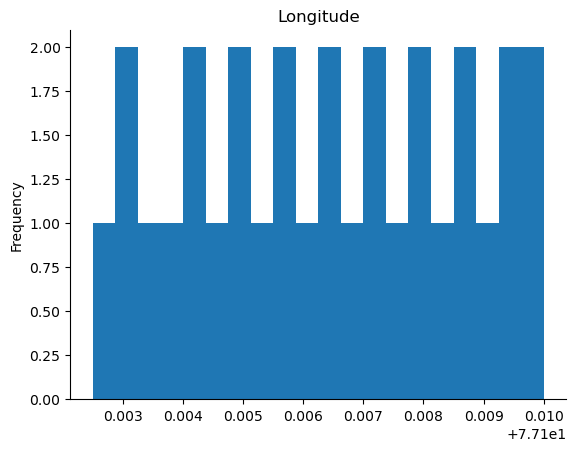

In [17]:
df['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

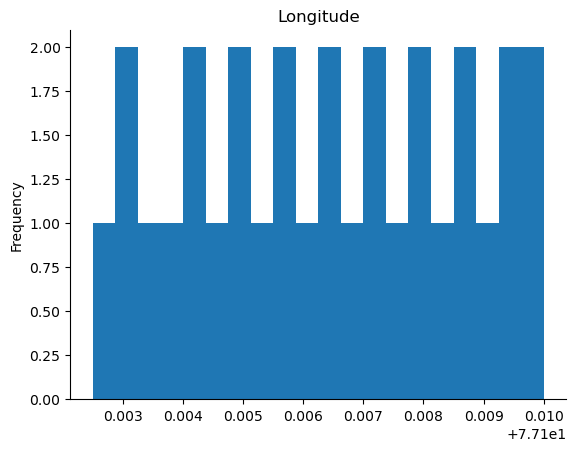

In [18]:
df['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

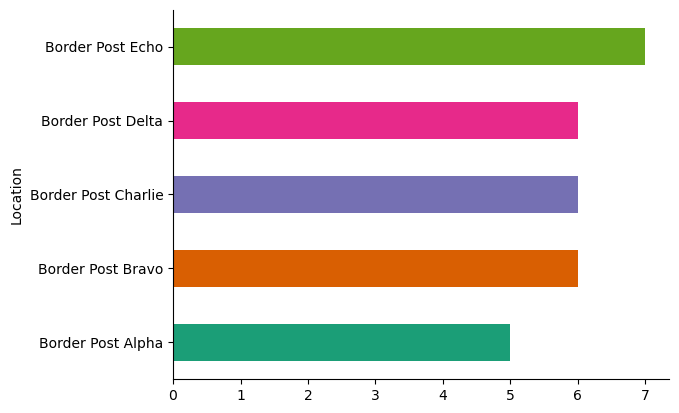

In [19]:
df.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

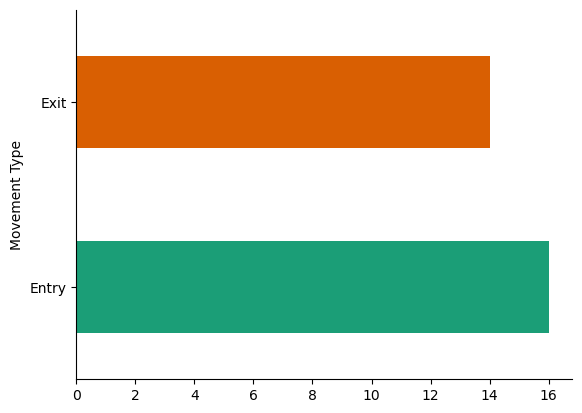

In [20]:
df.groupby('Movement Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

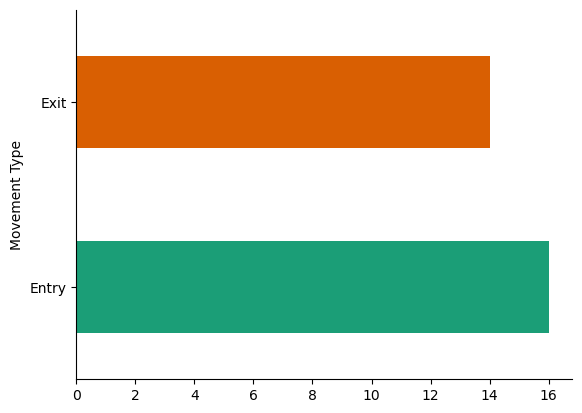

In [21]:
df.groupby('Movement Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

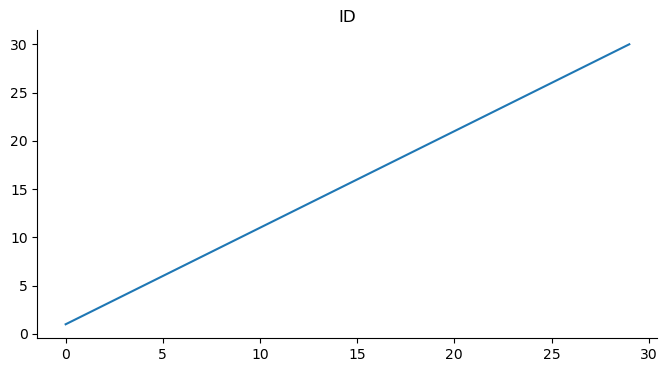

In [22]:
df['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

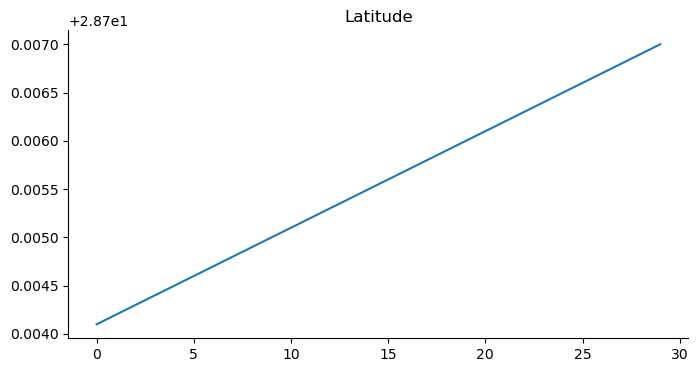

In [23]:
df['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

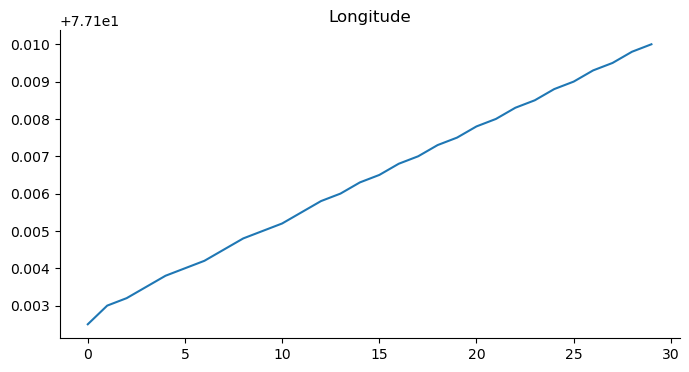

In [24]:
df['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

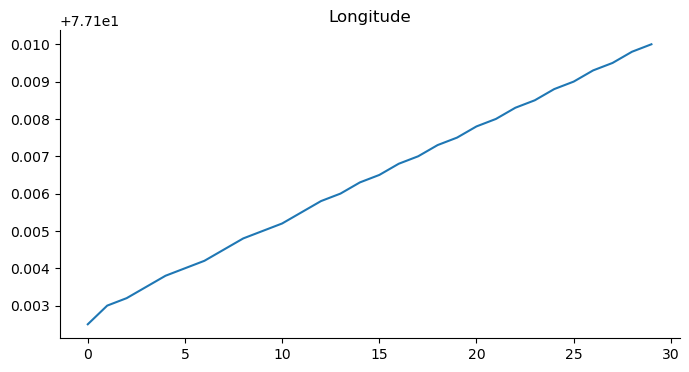

In [25]:
df['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

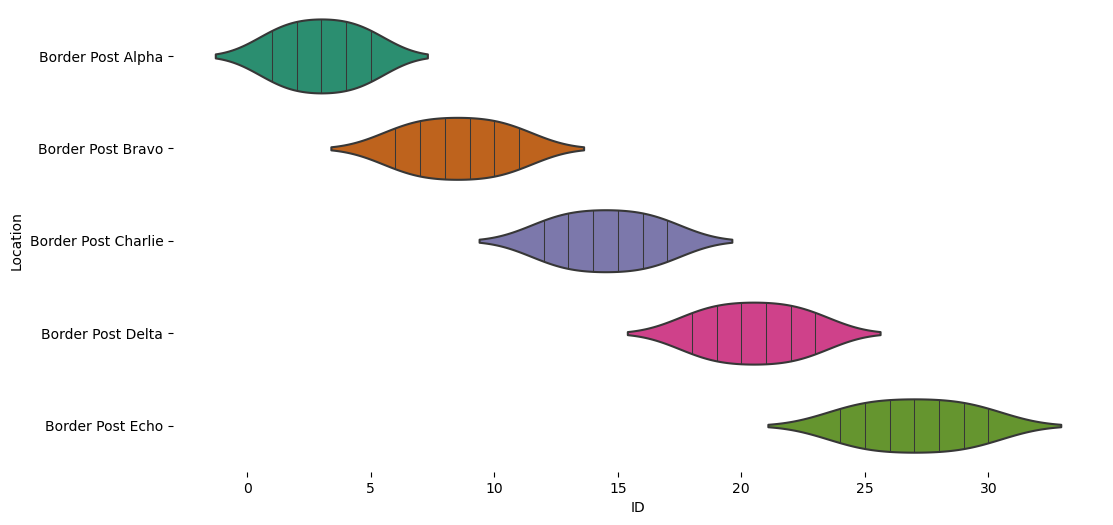

In [26]:
figsize = (12, 1.2 * len(df['Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ID', y='Location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


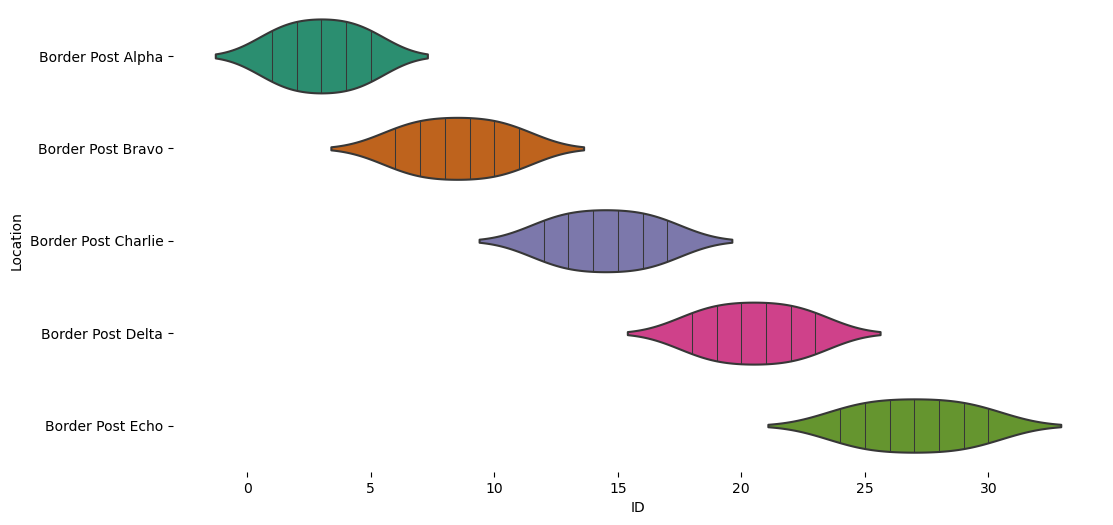

In [27]:
figsize = (12, 1.2 * len(df['Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ID', y='Location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

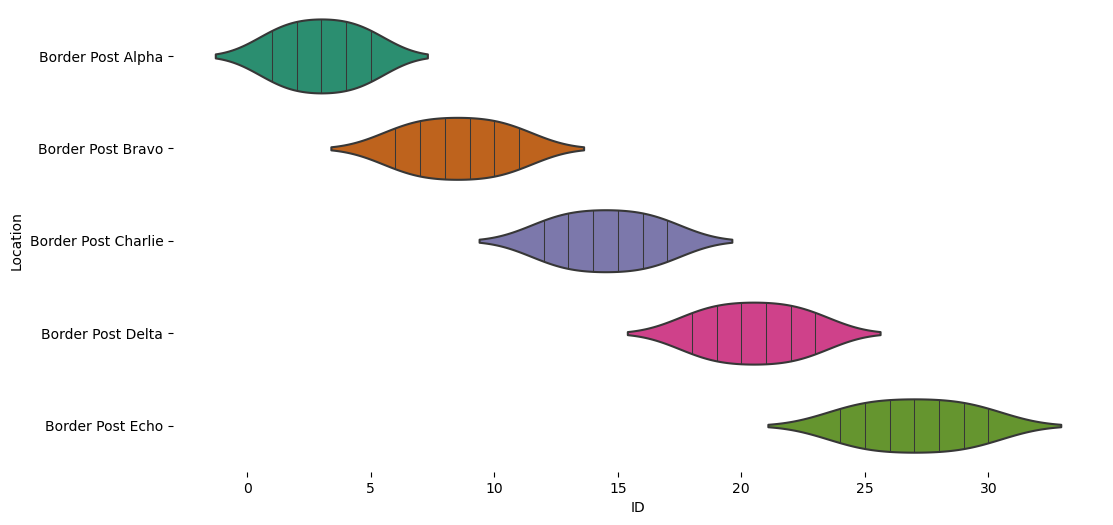

In [28]:
figsize = (12, 1.2 * len(df['Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ID', y='Location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)